# Part A: The Iris Dataset

## By: Jeffrey Cabrera

In [1]:
# import libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#Memory leak issues with KMeans
import os
os.environ["OMP_NUM_THREADS"] = '1'

%matplotlib inline

In [2]:
# Read in the iris dataset from the csv file
#The CSV file contains the header row
# specifying the column names
iris_data = pd.read_csv("../data/iris.csv")

In [3]:
# Display the first ten records
iris_data.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# Display the last ten records
iris_data.tail(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Display the shape (# of rows, # of columns)
iris_data.shape

(150, 5)

In [6]:
# Display the data types
iris_data.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species         object
dtype: object

In [7]:
# check if there are null values
iris_data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [8]:
# Produce a list of the record count for each species
iris_data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
# Group the Species and run descriptive statics
# Transpose the DatFrame to view the statics
# in a readable form.
iris_data.groupby(["Species"]).describe().T

Species            Iris-setosa  Iris-versicolor  Iris-virginica
SepalLength count    50.000000        50.000000       50.000000
            mean      5.006000         5.936000        6.588000
            std       0.352490         0.516171        0.635880
            min       4.300000         4.900000        4.900000
            25%       4.800000         5.600000        6.225000
            50%       5.000000         5.900000        6.500000
            75%       5.200000         6.300000        6.900000
            max       5.800000         7.000000        7.900000
SepalWidth  count    50.000000        50.000000       50.000000
            mean      3.428000         2.770000        2.974000
            std       0.379064         0.313798        0.322497
            min       2.300000         2.000000        2.200000
            25%       3.200000         2.525000        2.800000
            50%       3.400000         2.800000        3.000000
            75%       3.675000         3.000000        3.175000
            max       4.400000         3.400000        3.800000
PetalLength count    50.000000        50.000000       50.000000
            mean      1.462000         4.260000        5.552000
            std       0.173664         0.469911        0.551895
            min       1.000000         3.000000        4.500000
            25%       1.400000         4.000000        5.100000
            50%       1.500000         4.350000        5.550000
            75%       1.575000         4.600000        5.875000
            max       1.900000         5.100000        6.900000
PetalWidth  count    50.000000        50.000000       50.000000
            mean      0.246000         1.326000        2.026000
            std       0.105386         0.197753        0.274650
            min       0.100000         1.000000        1.400000
            25%       0.200000         1.200000        1.800000
            50%       0.200000         1.300000        2.000000
            75%       0.300000         1.500000        2.300000
            max       0.600000         1.800000        2.500000

In [10]:
# Run the correlation matrix then display it
iris_corr = iris_data[iris_data.columns[:-1]].corr()
iris_corr

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.117570,0.871754,0.817941
SepalWidth,-0.117570,1.000000,-0.428440,-0.366126
PetalLength,0.871754,-0.428440,1.000000,0.962865
PetalWidth,0.817941,-0.366126,0.962865,1.000000


In [11]:
# Creating a more readable correlation matrix
features = list(iris_data.columns.values)[:-1]
groups = ["NegStrong", "NegMedium", "Weak", "PosMedium", "PosStrong"]
for col in features:
    iris_corr[col] = pd.cut(iris_corr[col], (-1, -0.7, -0.5, 0.5, 0.7, 1), labels=groups)
iris_corr

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,PosStrong,Weak,PosStrong,PosStrong
SepalWidth,Weak,PosStrong,Weak,Weak
PetalLength,PosStrong,Weak,PosStrong,PosStrong
PetalWidth,PosStrong,Weak,PosStrong,PosStrong


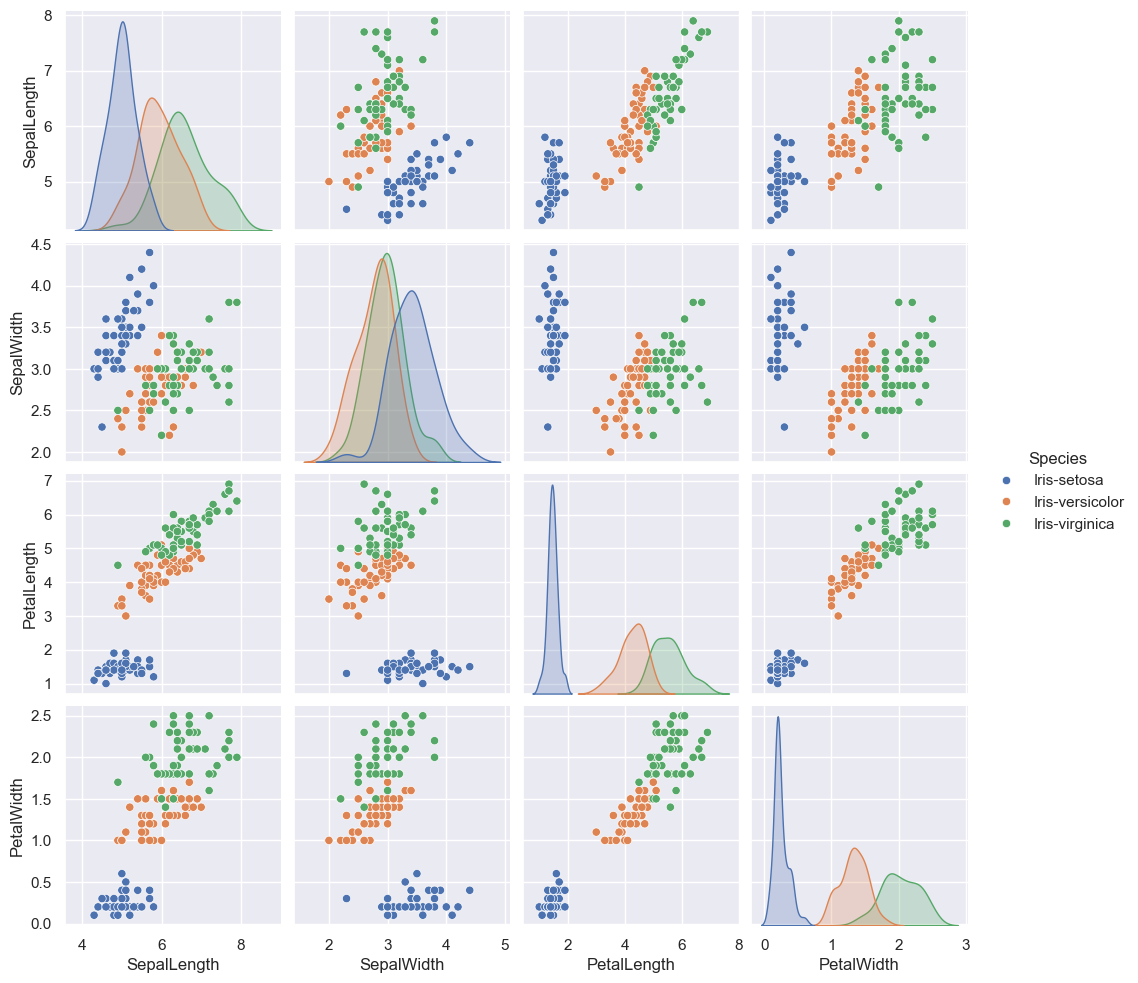

In [12]:
# Display a scatter pair plot
sns.pairplot(iris_data, hue="Species", height=2.5)

In [13]:
# Use matplotlib to display individual scatterplot matrices
# Use the pandas factorize function to produce a
# Numpy array with a numeric designation for species
species_cat = pd.factorize(iris_data["Species"])
species_cat

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object'))

In [14]:
# Let Y_iris hold the numpy array, the first element
Y_iris = species_cat[0]
Y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'SepalWidth')

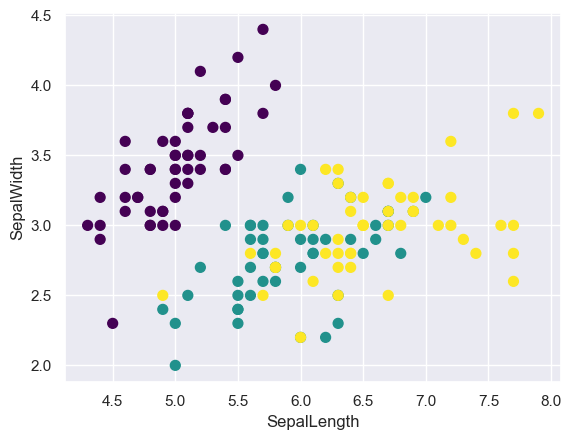

In [15]:
# Display the scatter plot for Sepal Length and Sepal width
x = 0  # Column Sepal Length
y = 1  # Column Sepal Width
plt.scatter(iris_data.iloc[:, x],
            iris_data.iloc[:, y],
            c=Y_iris,
            s = 50,
            cmap="viridis")
plt.xlabel(features[x])
plt.ylabel(features[y])

Text(0, 0.5, 'PetalWidth')

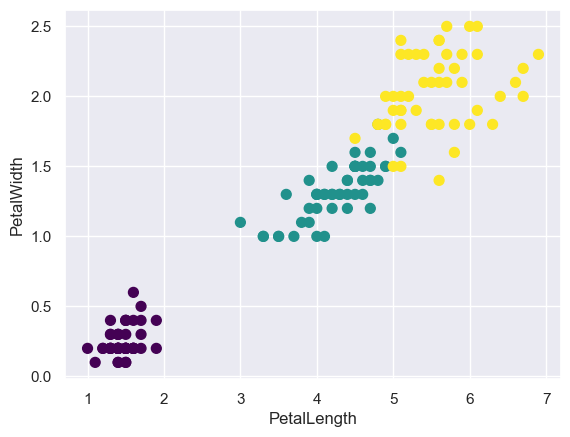

In [16]:
# Display the scatter plot for Petal Length and Petal width
x = 2  # Column Petal Length
y = 3  # Column Petal Width
plt.scatter(iris_data.iloc[:, x],
            iris_data.iloc[:, y],
            c=Y_iris,
            s = 50,
            cmap="viridis")
plt.xlabel(features[x])
plt.ylabel(features[y])

## Running KMeans clustering

In [17]:
# Drop the Species column
x_iris = iris_data.drop("Species", axis=1)
x_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# Run the KMeans algorithm on the X_iria DataFrame specifying 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(x_iris)
y_model = kmeans.predict(x_iris)

C:\Users\JeffTheMess\anaconda3\envs\Project 1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
# Display the y_model array
y_model

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [20]:
# Create y_test to hold the numpy array with the species categories changed to (1, 0, 2)
y_test = np.choose(Y_iris, [1, 0, 2]).astype(int)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
# Display the accuracy score for the clustering
acc_score = accuracy_score(y_test, y_model)
acc_score

0.8866666666666667

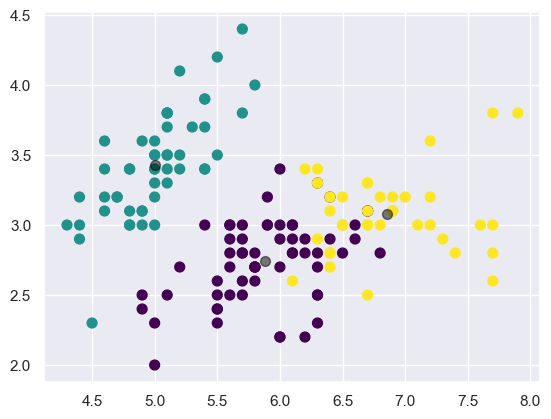

In [22]:
# Display the scatter plot from the KMeans algorithm for Sepal Length and Sepal Width with centroids
x = 0  # Column Sepal Length
y = 1  # Column Sepal Width
plt.scatter(x_iris.iloc[:, x],
            x_iris.iloc[:, y],
            c=y_model,
            s=50,
            cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, x],
            centers[:, y],
            c="black",
            s=50,
            alpha=0.5)

In [23]:
# Display the confusion matrix using an array
mat = confusion_matrix(y_test, y_model)
mat

array([[47,  0,  3],
       [ 0, 50,  0],
       [14,  0, 36]])

Text(110.44999999999997, 0.5, 'Actual Values')

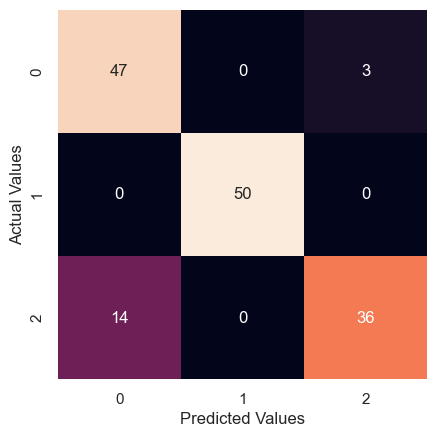

In [24]:
# Display the confusion matrix using a heat map
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

## PCA

In [25]:
# Let"s run the PCA algorithm, specifying the return of the first two principal components
# The data will be transformed into the two dimensions with the best possible separation
pcaModel = PCA(n_components=2)
pcaModel.fit(x_iris)
x_2D = pcaModel.transform(x_iris)

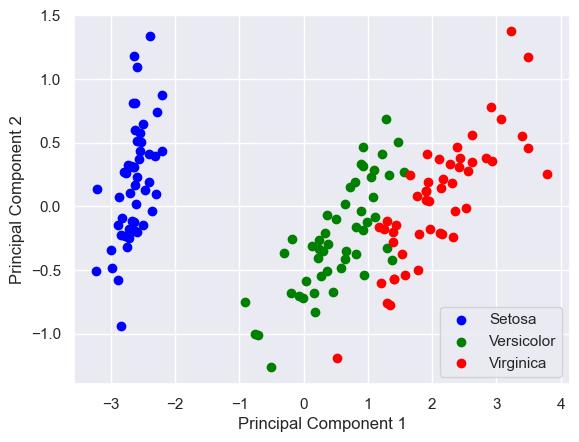

In [26]:
# Let"s use matplotlib scatter plot to display the first two principal components of the Iris dataset
for label, color, i in zip(("Setosa", "Versicolor", "Virginica"),
                           ("blue", "green", "red"), (0, 1, 2)):
    plt.scatter(x_2D[Y_iris == i, 0],
                x_2D[Y_iris == i, 1],
                label=label,
                color=color)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="lower right")

In [27]:
# Display the percentage of total variance for each of the first two components
pcaModel.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [28]:
# Display the total percentage of total variance for each of the first two components
sum(pcaModel.explained_variance_ratio_)

np.float64(0.9776852063187933)

In [29]:
# Let"s see the different if we standardize the features
x_std_iris = StandardScaler().fit_transform(x_iris)
x_std_iris[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [30]:
# Run the KMeans clustering of the standardize data
kmeans_std = KMeans(n_clusters=3, random_state=1)
kmeans_std.fit(x_std_iris)
y_model_std = kmeans_std.predict(x_std_iris)
y_model_std

C:\Users\JeffTheMess\anaconda3\envs\Project 1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

In [31]:
# Display the accuracy score for the clustering
acc_score_std = accuracy_score(y_test, y_model_std)
acc_score_std

0.8533333333333334

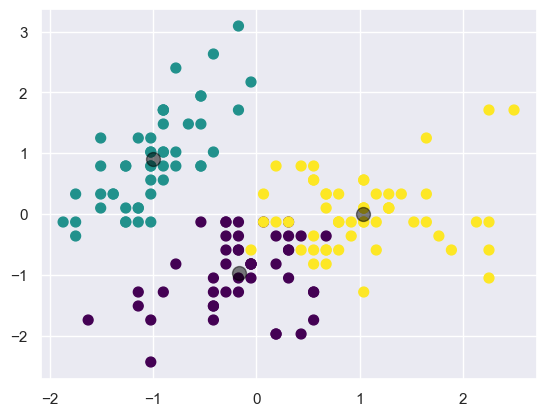

In [32]:

# Display the scatter plot from the KMeans algorithm for sepal length and sepal width with centroids
x = 0 # Column Petal Length
y = 1 # Column Petal Width
plt.scatter(x_std_iris[:, x],
            x_std_iris[:, y],
            c=y_model_std,
            s=50,
            cmap="viridis")
centers = kmeans_std.cluster_centers_
plt.scatter(centers[:, x],
            centers[:, y],
            c="black",
            s=100,
            alpha=0.5)

In [33]:
# Display the confusion matrix using an array
mat_std = confusion_matrix(y_test, y_model_std)
mat_std

array([[37,  0, 13],
       [ 1, 49,  0],
       [ 8,  0, 42]])

Text(110.44999999999997, 0.5, 'Actual Values')

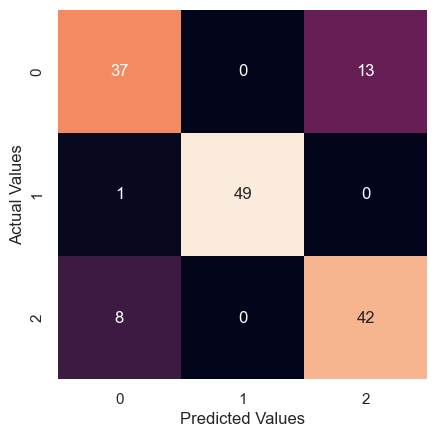

In [34]:
# Display the confusion matrix using a heat map
sns.heatmap(mat_std,
            square=True,
            annot=True,
            cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [35]:
# Let"s try to normalize the features for PCA
x_norm_iris = MinMaxScaler().fit_transform(x_iris)
x_norm_iris[:5, :]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [36]:
# Run the KMeans clustering on the Normalized data
kmeans_norm = KMeans(n_clusters=3, random_state=1)
kmeans_norm.fit(x_norm_iris)
y_model_norm = kmeans_norm.predict(x_norm_iris)
y_model_norm

C:\Users\JeffTheMess\anaconda3\envs\Project 1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [37]:
# Display the accuracy score for the clustering
acc_score_norm = accuracy_score(y_test, y_model_norm)
acc_score_norm

0.88

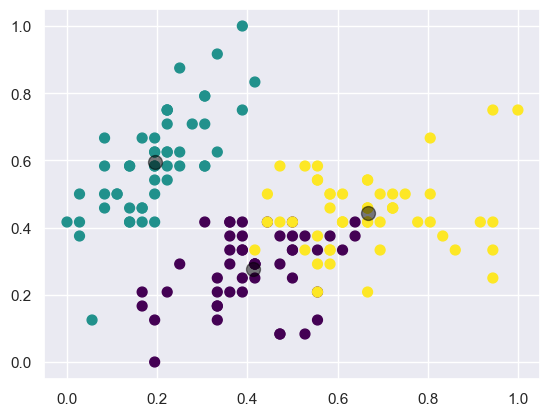

In [38]:
# Display the scatter plot from the KMeans algorithm for Sepal Length and Sepal Width with centroids
x = 0 # Columns Petal Width
y = 1 # Columns Petal Height
plt.scatter(x_norm_iris[:, x],
            x_norm_iris[:, y],
            c=y_model_norm,
            s=50,
            cmap="viridis")
centers = kmeans_norm.cluster_centers_
plt.scatter(centers[:, x],
            centers[:, y],
            c="black",
            s=100,
            alpha=0.5)

In [39]:
# Display the confusion matrix using an array
mat_norm = confusion_matrix(y_test, y_model_norm)
mat_norm

array([[40,  0, 10],
       [ 0, 50,  0],
       [ 8,  0, 42]])

Text(110.44999999999997, 0.5, 'Actual Values')

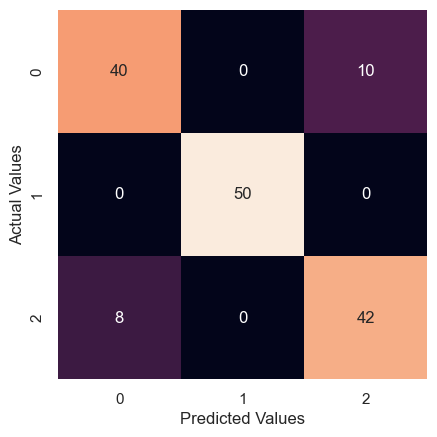

In [40]:
# Display the confusion matrix using a heat map
sns.heatmap(mat_norm, square=True, annot=True, cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

# Part B: The seed Dataset

In [41]:
# Import data with columns names
cols = ["Area", "Perimeter", "Compact", "Length", "Width", "Asym", "Groove", "Species"]
seed_data = pd.read_csv("../data/seeds.csv", names=cols)

In [42]:
# Display first 10 records
seed_data.head(10)

,Area,Perimeter,Compact,Length,Width,Asym,Groove,Species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [43]:
# Display the last 10 records
seed_data.tail(10)

,Area,Perimeter,Compact,Length,Width,Asym,Groove,Species
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,3
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3
202,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,3
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [44]:
# Display the shape
seed_data.shape

(210, 8)

In [45]:
# Display the data types
seed_data.dtypes

Area         float64
Perimeter    float64
Compact      float64
Length       float64
Width        float64
Asym         float64
Groove       float64
Species        int64
dtype: object

In [46]:
# Check if there are null values
seed_data.isnull().sum()

Area         0
Perimeter    0
Compact      0
Length       0
Width        0
Asym         0
Groove       0
Species      0
dtype: int64

In [47]:
# Display the count for each species
seed_data["Species"].value_counts()

Species
1    70
2    70
3    70
Name: count, dtype: int64

In [48]:
# Let's see the descriptive statistics
seed_data.groupby(["Species"]).describe().T

Species                  1          2          3
Area      count  70.000000  70.000000  70.000000
          mean   14.334429  18.334286  11.873857
          std     1.215704   1.439496   0.723004
          min    11.230000  15.380000  10.590000
          25%    13.750000  17.330000  11.262500
          50%    14.355000  18.720000  11.835000
          75%    15.045000  19.137500  12.425000
          max    17.080000  21.180000  13.370000
Perimeter count  70.000000  70.000000  70.000000
          mean   14.294286  16.135714  13.247857
          std     0.576583   0.616995   0.340196
          min    12.630000  14.660000  12.410000
          25%    13.960000  15.737500  13.002500
          50%    14.320000  16.210000  13.250000
          75%    14.732500  16.557500  13.470000
          max    15.460000  17.250000  13.950000
Compact   count  70.000000  70.000000  70.000000
          mean    0.880070   0.883517   0.849409
          std     0.016191   0.015500   0.021760
          min     0.839200   0.845200   0.808100
          25%     0.868850   0.872525   0.834000
          50%     0.880500   0.882600   0.849350
          75%     0.890400   0.898225   0.861825
          max     0.918300   0.910800   0.897700
Length    count  70.000000  70.000000  70.000000
          mean    5.508057   6.148029   5.229514
          std     0.231508   0.268191   0.138015
          min     4.902000   5.363000   4.899000
          25%     5.384500   5.979250   5.136250
          50%     5.534000   6.148500   5.224000
          75%     5.677000   6.312000   5.323750
          max     6.053000   6.675000   5.541000
Width     count  70.000000  70.000000  70.000000
          mean    3.244629   3.677414   2.853771
          std     0.177616   0.185539   0.147516
          min     2.850000   3.231000   2.630000
          25%     3.134250   3.554250   2.725500
          50%     3.243500   3.693500   2.834500
          75%     3.378500   3.804750   2.967000
          max     3.683000   4.033000   3.232000
Asym      count  70.000000  70.000000  70.000000
          mean    2.667403   3.644800   4.788400
          std     1.173901   1.181868   1.336465
          min     0.765100   1.472000   1.661000
          25%     1.826500   2.845500   4.048750
          50%     2.545500   3.609500   4.839000
          75%     3.301000   4.436000   5.467250
          max     6.685000   6.682000   8.456000
Groove    count  70.000000  70.000000  70.000000
          mean    5.087214   6.020600   5.116400
          std     0.263699   0.253934   0.162068
          min     4.519000   5.144000   4.745000
          25%     4.924500   5.877500   5.002000
          50%     5.094000   5.981500   5.091500
          75%     5.223500   6.187750   5.228500
          max     5.877000   6.550000   5.491000

In [49]:
# Let's create the correlation values for the seed data
seed_corr = seed_data.corr()
seed_corr

,Area,Perimeter,Compact,Length,Width,Asym,Groove,Species
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compact,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asym,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Species,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [50]:
# Let's create a more readable version of the correlation data
features = list(seed_data.columns.values)
groups = ["NegStrong", "NegMedium", "Weak", "PosMedium", "PosStrong"]
for col in features:
    seed_corr[col] = pd.cut(seed_corr[col], (-1, -0.7, -0.5, 0.5, 0.7, 1), labels=groups)
seed_corr

,Area,Perimeter,Compact,Length,Width,Asym,Groove,Species
Area,PosStrong,PosStrong,PosMedium,PosStrong,PosStrong,Weak,PosStrong,Weak
Perimeter,PosStrong,PosStrong,PosMedium,PosStrong,PosStrong,Weak,PosStrong,Weak
Compact,PosMedium,PosMedium,PosStrong,Weak,PosStrong,Weak,Weak,NegMedium
Length,PosStrong,PosStrong,Weak,PosStrong,PosStrong,Weak,PosStrong,Weak
Width,PosStrong,PosStrong,PosStrong,PosStrong,PosStrong,Weak,PosStrong,Weak
Asym,Weak,Weak,Weak,Weak,Weak,PosStrong,Weak,PosMedium
Groove,PosStrong,PosStrong,Weak,PosStrong,PosStrong,Weak,PosStrong,Weak
Species,Weak,Weak,NegMedium,Weak,Weak,PosMedium,Weak,PosStrong


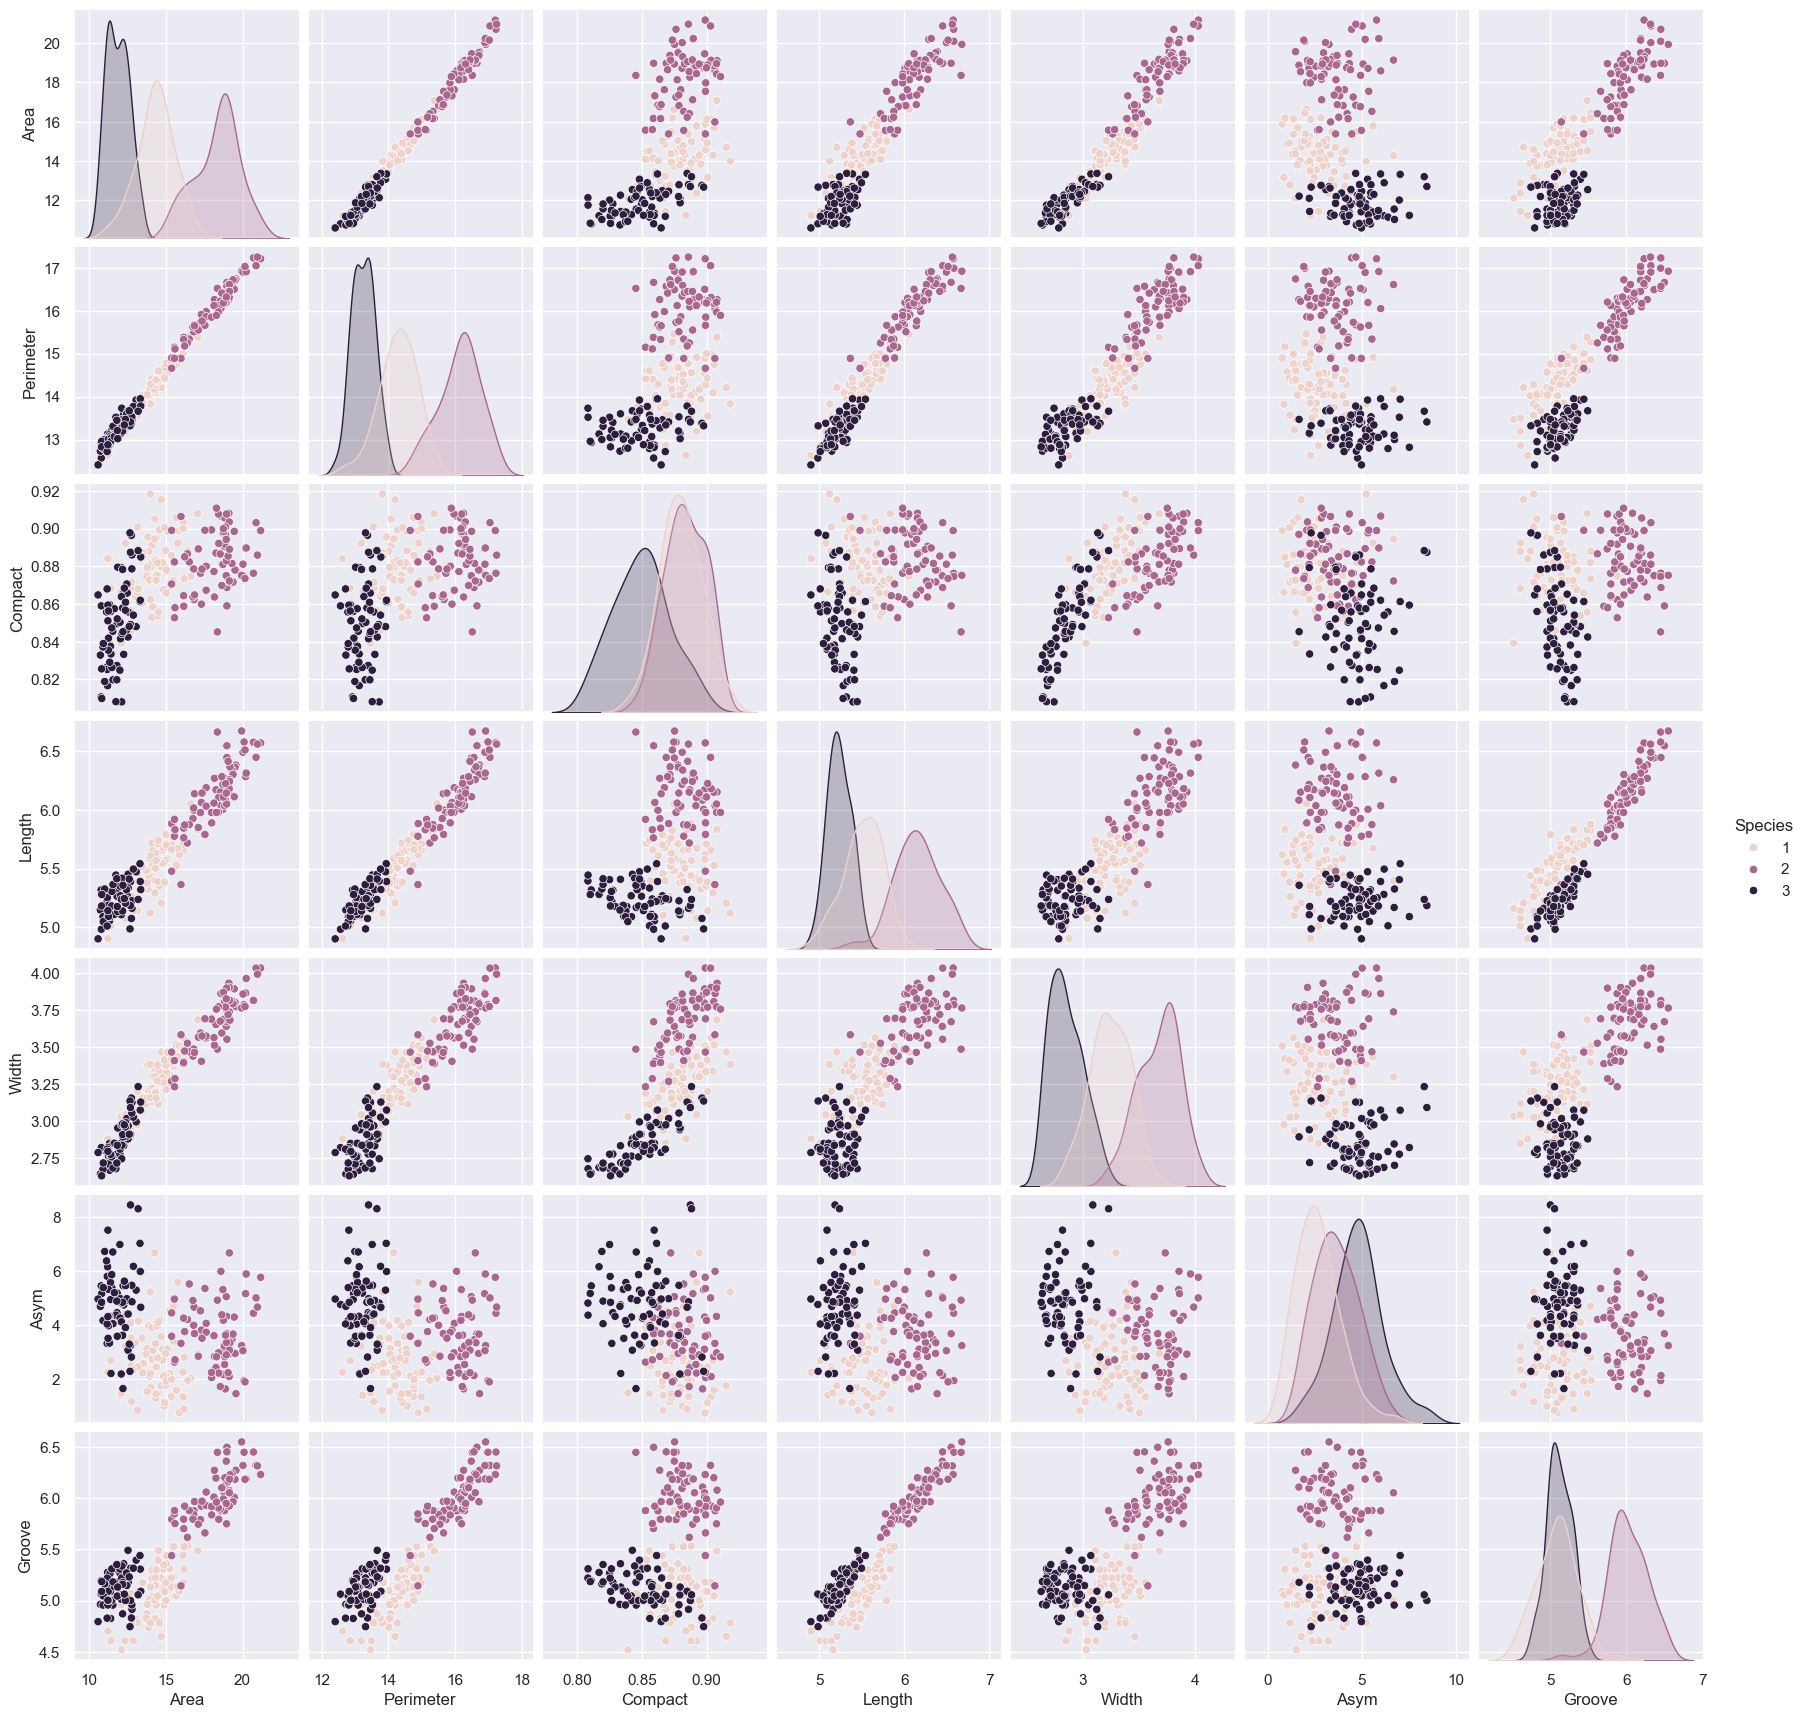

In [51]:
# Display a scatter pair plot
sns.pairplot(seed_data, hue="Species", height=2.5)

In [52]:
# Factorize the seed data, then display it
species_cat = pd.factorize(seed_data['Species'])
y_seed = species_cat[0]
y_seed

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'Perimeter')

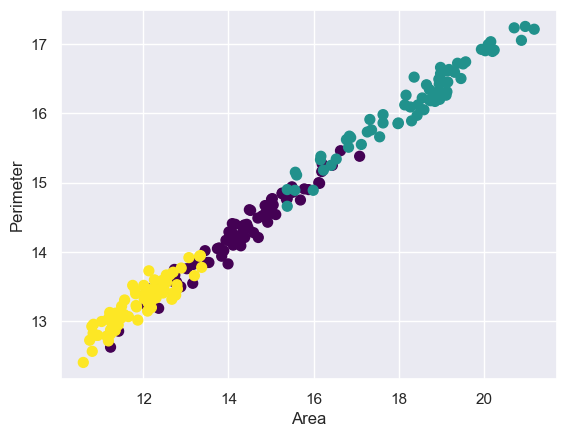

In [53]:
# Display the scatter plot for area and perimeter
x = 0  # Columns for area
y = 1  # Column for perimeter
plt.scatter(seed_data.iloc[:, x],
            seed_data.iloc[:, y],
            c=y_seed,
            s=50,
            cmap="viridis")
plt.xlabel(cols[x])
plt.ylabel(cols[y])

## Running KMeans clustering

In [54]:
x_seed = seed_data.drop("Species", axis=1)
x_seed.head()

,Area,Perimeter,Compact,Length,Width,Asym,Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [55]:
# Run the KMeans algorith on the seed data
kmeans = KMeans (n_clusters = 3, random_state = 1)
kmeans.fit (x_seed)
y_model = kmeans.predict(x_seed)
y_model

C:\Users\JeffTheMess\anaconda3\envs\Project 1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [56]:
# create the y_test to hold the numpy array
#y_test = np.choose(y_seed, [1,0,2]).astype(int)
y_test = np.choose(y_seed, [2,0,1]).astype(int)
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
acc_score_seed = accuracy_score(y_test, y_model)
acc_score_seed

0.34285714285714286

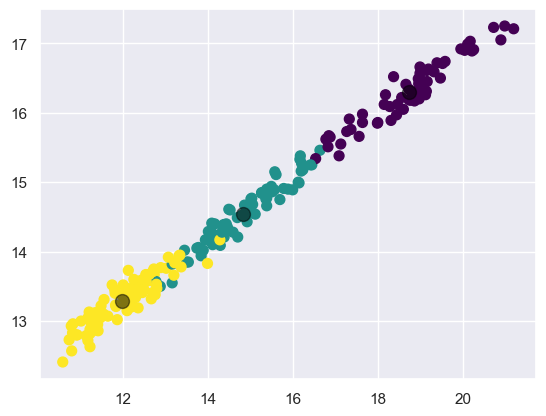

In [58]:
# Display the scatter plot from the KMeans algorithm for Sepal Length and Sepal Width with centroids
x = 0 # Column Area
y = 1 # Column Perimeter
plt.scatter(x_seed.iloc[:,x],
            x_seed.iloc[:,y],
            c=y_model,
            s=50,
            cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, x],
            centers[:, y],
            c="black",
            s=100,
            alpha=0.5)

Text(110.44999999999997, 0.5, 'Actual Values')

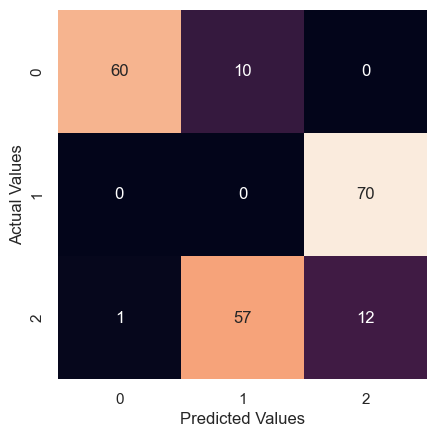

In [59]:
# Display teh confusion matrix
mat = confusion_matrix(y_test, y_model)
# Display the confusion matrix using a heat map
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

## Running PCA

In [60]:
model = PCA(n_components=2)
model.fit(x_seed)
x_2d = model.transform(x_seed)

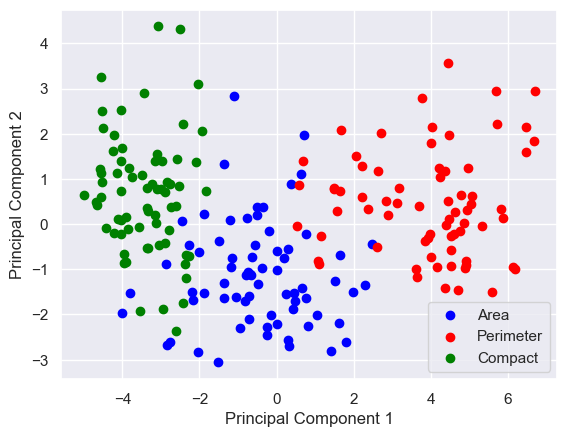

In [61]:
for label, color, i in zip(("Area", "Perimeter", "Compact", "Length", "Width", "Asym", "Groove", "Species"),
                           ('blue','red','green'),
                           (0, 1, 2)):
    plt.scatter (x_2d[y_seed == i, 0],
                x_2d[y_seed == i, 1],
                label=label, color=color)
plt.xlabel ('Principal Component 1')
plt.ylabel ('Principal Component 2')
plt.legend(loc = 'lower right');

In [62]:
# Display the percentage of total variance for each of the first two components
model.explained_variance_ratio_

array([0.8293852 , 0.16363245])

In [63]:
# Display the total percentage of total for each of the first two components
sum(model.explained_variance_ratio_)

np.float64(0.9930176488286873)

## Standardization before KMeans

In [64]:
# Rescale the features using standardization
x_std_seed = StandardScaler().fit_transform(x_seed)
x_std_seed[:6, :]

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05,
         3.04218199e-01,  1.41701823e-01, -9.86151745e-01,
        -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01,
        -1.68624664e-01,  1.97432229e-01, -1.78816620e+00,
        -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00,
        -7.63637453e-01,  2.08047544e-01, -6.67479334e-01,
        -1.18919199e+00],
       [-3.47091272e-01, -4.75333162e-01,  1.03938133e+00,
        -6.88978054e-01,  3.19508356e-01, -9.60817955e-01,
        -1.22998260e+00],
       [ 4.45257175e-01,  3.30595037e-01,  1.37450924e+00,
         6.66655647e-02,  8.05159035e-01, -1.56349549e+00,
        -4.75356297e-01],
       [-1.61061637e-01, -2.68094482e-01,  1.02241283e+00,
        -5.48708879e-01,  1.41701823e-01, -8.25482182e-01,
        -9.22013487e-01]])

In [65]:
# Run the KMeans clustering on the standardized data
kmeans_std = KMeans(n_clusters=3, random_state=1)
kmeans_std.fit(x_std_seed)
y_model = kmeans_std.predict(x_std_seed)
y_model

C:\Users\JeffTheMess\anaconda3\envs\Project 1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [66]:
# Display the accuracy score for the clustering
acc_score = accuracy_score(y_test, y_model)
acc_score

0.919047619047619

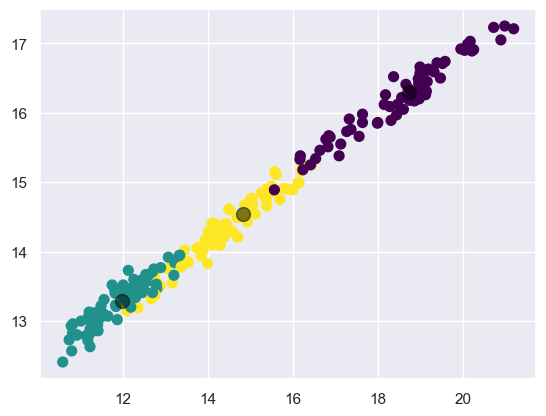

In [67]:
# Display the scatter plot from the KMeans algorithm
# For Sepal Length and Sepal Width with centroids
x = 0 # Column area
y = 1 # Column perimeter
plt.scatter (x_seed.iloc[:,x], x_seed.iloc[:,y],
            c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter (centers[:,x], centers[:,y],
            c = 'black', s = 100, alpha = 0.5);

Text(110.44999999999997, 0.5, 'Actual Values')

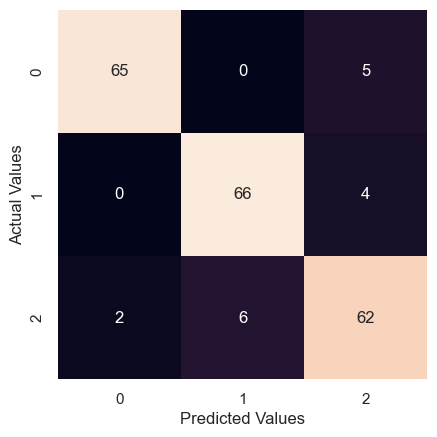

In [68]:
# Display the confusion matrix
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

## Normalization before KMeans

In [70]:
x_norm_seed = MinMaxScaler().fit_transform(x_seed)
x_norm_seed[:5, :]

array([[0.44098206, 0.50206612, 0.5707804 , 0.48648649, 0.48610121,
        0.18930164, 0.34515017],
       [0.40509915, 0.44628099, 0.66243194, 0.36880631, 0.50106914,
        0.03288302, 0.21516494],
       [0.34938621, 0.34710744, 0.87931034, 0.22072072, 0.50392017,
        0.25145302, 0.1506647 ],
       [0.3068933 , 0.3161157 , 0.79310345, 0.2393018 , 0.53385602,
        0.19424255, 0.14081733],
       [0.52407932, 0.53305785, 0.86479129, 0.42736486, 0.66429081,
        0.07670104, 0.3229936 ]])

In [71]:
# Run the KMeans clustering on the standardized data
kmeans_norm = KMeans(n_clusters=3, random_state=1)
kmeans_norm.fit(x_norm_seed)
y_model = kmeans_norm.predict(x_norm_seed)
y_model

C:\Users\JeffTheMess\anaconda3\envs\Project 1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [72]:
# Display the accuracy score for the clustering
acc_score = accuracy_score(y_test, y_model)
acc_score

0.3523809523809524

Text(110.44999999999997, 0.5, 'Actual Values')

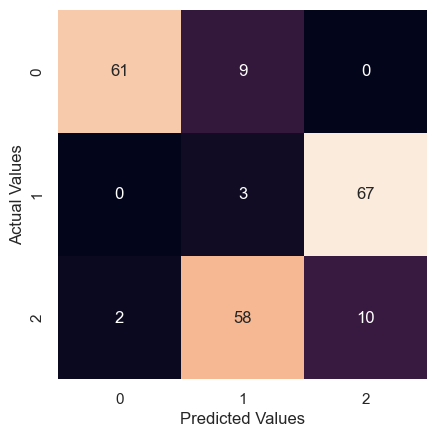

In [74]:
# Display the confusion matrix
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")